In [93]:
from datetime import datetime
from IPython.display import Markdown, display
from pprint import pprint

import pandas as pd
import matplotlib.pyplot as plt

## download

In [94]:
df = (
    pd.json_normalize(
    pd.read_json(
        "https://rest.uniprot.org/uniprotkb/stream?download=true&format=json&query=%28%28fragment%3Atrue%29+AND+%28reviewed%3Atrue%29%29")["results"]
    )
)

display(Markdown(f"**Dataset was downloaded at:** `{datetime.now().strftime('%Y-%m-%d %H:%M:%S')}`"))
df

**Dataset was downloaded at:** `2025-11-14 00:32:46`

,entryType,primaryAccession,uniProtkbId,annotationScore,proteinExistence,comments,features,keywords,references,uniProtKBCrossReferences,...,extraAttributes.countByFeatureType.Non-standard residue,proteinDescription.cdAntigenNames,extraAttributes.countByFeatureType.Natural variant,extraAttributes.countByFeatureType.Zinc finger,organismHosts,extraAttributes.countByCommentType.INTERACTION,extraAttributes.countByCommentType.DISEASE,extraAttributes.countByCommentType.POLYMORPHISM,geneLocations,extraAttributes.countByCommentType.RNA EDITING
0,UniProtKB reviewed (Swiss-Prot),A0A068B6Q6,CA18_CONBE,5.0,1: Evidence at protein level,[{'texts': [{'evidences': [{'evidenceCode': 'E...,"[{'type': 'Propeptide', 'location': {'start': ...","[{'id': 'KW-0002', 'category': 'Technical term...","[{'referenceNumber': 1, 'citation': {'id': 'CI...","[{'database': 'EMBL', 'id': 'KF414094', 'prope...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,UniProtKB reviewed (Swiss-Prot),A0A0D4WTV1,B1D1_LOXAR,5.0,1: Evidence at protein level,[{'texts': [{'evidences': [{'evidenceCode': 'E...,"[{'type': 'Signal', 'location': {'start': {'va...","[{'id': 'KW-0204', 'category': 'Biological pro...","[{'referenceNumber': 1, 'citation': {'id': '25...","[{'database': 'EMBL', 'id': 'KM884812', 'prope...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,UniProtKB reviewed (Swiss-Prot),A2QC57,CSMA_ASPNC,5.0,3: Inferred from homology,[{'texts': [{'evidences': [{'evidenceCode': 'E...,"[{'type': 'Chain', 'location': {'start': {'val...","[{'id': 'KW-0009', 'category': 'Molecular func...","[{'referenceNumber': 1, 'citation': {'id': '17...","[{'database': 'EMBL', 'id': 'AM269999', 'prope...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,UniProtKB reviewed (Swiss-Prot),A2TK72,VM3A2_DEIAC,5.0,1: Evidence at protein level,[{'texts': [{'evidences': [{'evidenceCode': 'E...,"[{'type': 'Chain', 'location': {'start': {'val...","[{'id': 'KW-0106', 'category': 'Ligand', 'name...","[{'referenceNumber': 1, 'citation': {'id': '18...","[{'database': 'EMBL', 'id': 'EF210359', 'prope...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UniProtKB reviewed (Swiss-Prot),A5YVK8,ERVA_TABDI,5.0,1: Evidence at protein level,[{'texts': [{'evidences': [{'evidenceCode': 'E...,"[{'type': 'Chain', 'location': {'start': {'val...","[{'id': 'KW-0002', 'category': 'Technical term...","[{'referenceNumber': 1, 'citation': {'id': '18...","[{'database': 'EMBL', 'id': 'EF591130', 'prope...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9275,UniProtKB reviewed (Swiss-Prot),Q9R4P1,RS21_BREVE,1.0,1: Evidence at protein level,[{'texts': [{'evidences': [{'evidenceCode': 'E...,"[{'type': 'Chain', 'location': {'start': {'val...","[{'id': 'KW-0903', 'category': 'Technical term...","[{'referenceNumber': 1, 'citation': {'id': '77...","[{'database': 'AlphaFoldDB', 'id': 'Q9R4P1', '...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9276,UniProtKB reviewed (Swiss-Prot),Q9R4P4,RL29_BREDI,1.0,1: Evidence at protein level,[{'texts': [{'evidences': [{'evidenceCode': 'E...,"[{'type': 'Chain', 'location': {'start': {'val...","[{'id': 'KW-0903', 'category': 'Technical term...","[{'referenceNumber': 1, 'citation': {'id': '77...","[{'database': 'STRING', 'id': '293.GCA_0009880...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9277,UniProtKB reviewed (Swiss-Prot),Q9R4P6,RS21_BREDI,1.0,1: Evidence at protein level,[{'texts': [{'evidences': [{'evidenceCode': 'E...,"[{'type': 'Chain', 'location': {'start': {'val...","[{'id': 'KW-0903', 'category': 'Technical term...","[{'referenceNumber': 1, 'citation': {'id': '77...","[{'database': 'GO', 'id': 'GO:1990904', 'prope...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9278,UniProtKB reviewed (Swiss-Prot),Q9R5V8,RL29_ECTME,1.0,1: Evidence at protein level,[{'texts': [{'evidences': [{'evidenceCode': 'E...,"[{'type': 'Chain', 'location': {'start': {'val...","[{'id': 'KW-0903', 'category': 'Technical term...","[{'referenceNumbe

In [95]:
pprint(df.columns.tolist())

['entryType',
 'primaryAccession',
 'uniProtkbId',
 'annotationScore',
 'proteinExistence',
 'comments',
 'features',
 'keywords',
 'references',
 'uniProtKBCrossReferences',
 'entryAudit.firstPublicDate',
 'entryAudit.lastAnnotationUpdateDate',
 'entryAudit.lastSequenceUpdateDate',
 'entryAudit.entryVersion',
 'entryAudit.sequenceVersion',
 'organism.scientificName',
 'organism.commonName',
 'organism.taxonId',
 'organism.lineage',
 'proteinDescription.recommendedName.fullName.evidences',
 'proteinDescription.recommendedName.fullName.value',
 'proteinDescription.flag',
 'sequence.value',
 'sequence.length',
 'sequence.molWeight',
 'sequence.crc64',
 'sequence.md5',
 'extraAttributes.countByCommentType.FUNCTION',
 'extraAttributes.countByCommentType.SUBCELLULAR LOCATION',
 'extraAttributes.countByCommentType.TISSUE SPECIFICITY',
 'extraAttributes.countByCommentType.DOMAIN',
 'extraAttributes.countByCommentType.MISCELLANEOUS',
 'extraAttributes.countByCommentType.SIMILARITY',
 'extraAtt

In [96]:
clean_data = pd.DataFrame({
    "identifier": df["primaryAccession"],
    "sequence": df["sequence.value"],
    "fragment_type": ""
})
clean_data

,identifier,sequence,fragment_type
0,A0A068B6Q6,PDGRNAAAKAFDLITPTVRKGCCSNPACILNNPNQCG,
1,A0A0D4WTV1,EGAEQDGSERTDGGRPIWNIAHMVNNKQAIDKYLDKGANSVESDVS...,
2,A2QC57,MAGPAPSGRTPSHAQSSLPSLPAHLQSDTHLTAHLASRFHVGLPTA...,
3,A2TK72,KREAEANRTPEQQIYDPYKYVETVFVVDKAMVTKYNGDLDKIKTRM...,
4,A5YVK8,AVIPLKNQGKCGSCWAFSTVTTVESINQIRTGNLISLSEQQLVDCS...,
...,...,...,...
9275,Q9R4P1,VQIFVRDNNVDQALKALK,
9276,Q9R4P4,TKIADLRSQTVDQLSDXLXKL,
9277,Q9R4P6,VQIFVXDNNVDQALK,
9278,Q9R5V8,MKATELREKSAQQLNXQLL,


## exploration

In [97]:
n_with_X = (df["sequence.value"].str.contains("X")).sum()
print("Proteins with at least one X:", n_with_X)

Proteins with at least one X: 947


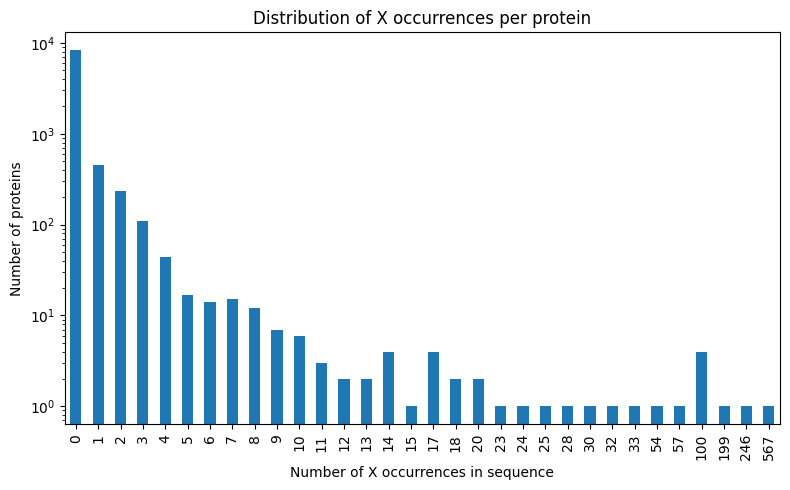

In [98]:
df["n_X"] = df["sequence.value"].str.count("X")
counts = df["n_X"].value_counts().sort_index()

plt.figure(figsize=(8,5))
counts.plot(kind="bar")
plt.xlabel("Number of X occurrences in sequence")
plt.ylabel("Number of proteins")
plt.yscale("log")
plt.title("Distribution of X occurrences per protein")
plt.tight_layout()
plt.show()


In [99]:
df[df["n_X"] >= 100]

,entryType,primaryAccession,uniProtkbId,annotationScore,proteinExistence,comments,features,keywords,references,uniProtKBCrossReferences,...,proteinDescription.cdAntigenNames,extraAttributes.countByFeatureType.Natural variant,extraAttributes.countByFeatureType.Zinc finger,organismHosts,extraAttributes.countByCommentType.INTERACTION,extraAttributes.countByCommentType.DISEASE,extraAttributes.countByCommentType.POLYMORPHISM,geneLocations,extraAttributes.countByCommentType.RNA EDITING,n_X
912,UniProtKB reviewed (Swiss-Prot),P0DPS2,OXLA_TRIPP,4.0,1: Evidence at protein level,[{'texts': [{'evidences': [{'evidenceCode': 'E...,"[{'type': 'Chain', 'location': {'start': {'val...","[{'id': 'KW-0044', 'category': 'Molecular func...","[{'referenceNumber': 1, 'citation': {'id': '29...","[{'database': 'SABIO-RK', 'id': 'P0DPS2', 'pro...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199
979,UniProtKB reviewed (Swiss-Prot),P14274,CB2A_SOLLC,4.0,3: Inferred from homology,[{'texts': [{'value': 'The light-harvesting co...,"[{'type': 'Transit peptide', 'location': {'sta...","[{'id': 'KW-0148', 'category': 'Ligand', 'name...","[{'referenceNumber': 1, 'citation': {'id': '30...","[{'database': 'EMBL', 'id': 'M30615', 'propert...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
980,UniProtKB reviewed (Swiss-Prot),P14275,CB2C_SOLLC,4.0,3: Inferred from homology,[{'texts': [{'value': 'The light-harvesting co...,"[{'type': 'Transit peptide', 'location': {'sta...","[{'id': 'KW-0148', 'category': 'Ligand', 'name...","[{'referenceNumber': 1, 'citation': {'id': '30...","[{'database': 'EMBL', 'id': 'M30617', 'propert...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
981,UniProtKB reviewed (Swiss-Prot),P14276,CB2E_SOLLC,4.0,3: Inferred from homology,[{'texts': [{'value': 'The light-harvesting co...,"[{'type': 'Transit peptide', 'location': {'sta...","[{'id': 'KW-0148', 'category': 'Ligand', 'name...","[{'referenceNumber': 1, 'citation': {'id': '30...","[{'database': 'EMBL', 'id': 'M30619', 'propert...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
982,UniProtKB reviewed (Swiss-Prot),P14277,CB2F_SOLLC,4.0,3: Inferred from homology,[{'texts': [{'value': 'The light-harvesting co...,"[{'type': 'Transit peptide', 'location': {'sta...","[{'id': 'KW-0148', 'category': 'Ligand', 'name...","[{'referenceNumber': 1, 'citation': {'id': '30...","[{'database': 'EMBL', 'id': 'M30621', 'propert...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
992,UniProtKB reviewed (Swiss-Prot),P16274,IFEA_HELPO,4.0,1: Evidence at protein level,[{'texts': [{'value': 'Epithelial intermediate...,"[{'type': 'Chain', 'location': {'start': {'val...","[{'id': 'KW-0007', 'category': 'PTM', 'name': ...","[{'referenceNumber': 1, 'citation': {'id': '31...","[{'database': 'PIR', 'id': 'S01295', 'properti...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246
4040,UniProtKB reviewed (Swiss-Prot),P85153,CO2A1_MAMAE,3.0,1: Evidence at protein level,[{'texts': [{'evidences': [{'evidenceCode': 'E...,"[{'type': 'Chain', 'location': {'start': {'val...","[{'id': 'KW-0176', 'category': 'Domain', 'name...","[{'referenceNumber': 1, 'citation': {'id': 'CI...","[{'database': 'GO', 'id': 'GO:0005581', 'prope...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,567


In [100]:
tmp = df["features"].explode()
features = pd.json_normalize(tmp)
pprint(features["type"].unique().tolist())
features

['Propeptide',
 'Peptide',
 'Site',
 'Modified residue',
 'Disulfide bond',
 'Mutagenesis',
 'Non-terminal residue',
 'Beta strand',
 'Helix',
 'Signal',
 'Chain',
 'Active site',
 'Binding site',
 'Transmembrane',
 'Domain',
 'Region',
 'Compositional bias',
 'Glycosylation',
 'Turn',
 'Transit peptide',
 'Motif',
 'Initiator methionine',
 'Cross-link',
 'Non-adjacent residues',
 'Topological domain',
 'Sequence conflict',
 'Repeat',
 'Sequence uncertainty',
 'Coiled coil',
 'Alternative sequence',
 'Intramembrane',
 'Lipidation',
 'DNA binding',
 'Non-standard residue',
 'Natural variant',
 'Zinc finger']


,type,description,evidences,featureId,location.start.value,location.start.modifier,location.end.value,location.end.modifier,alternativeSequence.originalSequence,alternativeSequence.alternativeSequences,featureCrossReferences,ligand.name,ligand.id,ligand.label,ligand.note,ligandPart.name,ligandPart.id,location.sequence
0,Propeptide,,"[{'evidenceCode': 'ECO:0000250', 'source': 'Un...",PRO_0000448284,1.0,OUTSIDE,20.0,EXACT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Peptide,Conotoxin Bt1.8,"[{'evidenceCode': 'ECO:0000250', 'source': 'Un...",PRO_0000448285,21.0,EXACT,36.0,EXACT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Site,Important for binding to nAChR,"[{'evidenceCode': 'ECO:0000269', 'source': 'Pu...",NaN,29.0,EXACT,29.0,EXACT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Site,Moderately important for binding to nAChR,"[{'evidenceCode': 'ECO:0000269', 'source': 'Pu...",NaN,30.0,EXACT,30.0,EXACT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Site,Important for binding to nAChR,"[{'evidenceCode': 'ECO:0000269', 'source': 'Pu...",NaN,31.0,EXACT,31.0,EXACT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85457,Non-terminal residue,,NaN,NaN,15.0,EXACT,15.0,EXACT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85458,Chain,Large ribosomal subunit protein uL29,NaN,PRO_0000224002,1.0,EXACT,19.0,OUTSIDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85459,Non-terminal residue,,NaN,NaN,19.0,EXACT,19.0,EXACT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85460,Chain,Mite allergen Lep d 5,NaN,PRO_0000151067,1.0,OUTSIDE,110.0,EXACT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
# --- 1. Fragment-related feature types ---
FRAG_TYPES = {
    "Non-terminal residue",
    "Sequence uncertainty",
    "Non-adjacent residues",
}

def get_fragment_related_features(features):
    """Extract only fragment-related features from feature list."""
    if not isinstance(features, list):
        return []
    return [f for f in features if f.get("type") in FRAG_TYPES]


# --- 2. Prepare inspect DF ---
inspect = df.copy()

# Count X
inspect["n_X"] = inspect["sequence.value"].str.count("X")

# Extract fragment-related features
inspect["fragment_features"] = inspect["features"].apply(get_fragment_related_features)


# --- 3. Helper functions ---

def has_internal_gap(row):
    """Internal gap = X or Non-adjacent residues."""
    if row["n_X"] > 0:
        return True
    return any(f.get("type") == "Non-adjacent residues" for f in row["fragment_features"])


def terminal_status(row):
    """Return (n_missing, c_missing) inferred from Non-terminal residue features."""
    n_missing = False
    c_missing = False
    seq_len   = len(row["sequence.value"])

    for f in row["fragment_features"]:
        if f.get("type") == "Non-terminal residue":
            loc = f.get("location", {})
            start = loc.get("start", {}).get("value")
            end   = loc.get("end", {}).get("value")

            if start == 1:
                n_missing = True
            if end == seq_len:
                c_missing = True

    return n_missing, c_missing


def classify_fragment(row):
    """Full UniProt-aligned fragment classification."""
    internal = has_internal_gap(row)
    n_missing, c_missing = terminal_status(row)

    # Mixed internal + terminal
    if internal and (n_missing or c_missing):
        return "mixed"

    # Pure internal gap
    if internal:
        return "internal_gap"

    # Pure terminal cases
    if n_missing and c_missing:
        return "terminal_both"
    if n_missing:
        return "terminal_N"
    if c_missing:
        return "terminal_C"

    # No internal gap, no terminal annotations → terminal truncation but unannotated
    if len(row["fragment_features"]) == 0 and row["n_X"] == 0:
        return "terminal_unannotated"

    # Safety catch
    return "complete"


# --- 4. Compute fragment_type ---
inspect["fragment_type"] = inspect.apply(classify_fragment, axis=1)


# --- 5. Build clean_data ---
clean_data = pd.DataFrame({
    "identifier":     inspect["primaryAccession"],
    "sequence":       inspect["sequence.value"],
    "n_X":            inspect["n_X"],
    "fragment_type":  inspect["fragment_type"],
})

clean_data.to_csv("clean_data.csv", index=False)
clean_data

,identifier,sequence,n_X,fragment_type
0,A0A068B6Q6,PDGRNAAAKAFDLITPTVRKGCCSNPACILNNPNQCG,0,terminal_N
1,A0A0D4WTV1,EGAEQDGSERTDGGRPIWNIAHMVNNKQAIDKYLDKGANSVESDVS...,0,terminal_N
2,A2QC57,MAGPAPSGRTPSHAQSSLPSLPAHLQSDTHLTAHLASRFHVGLPTA...,0,terminal_C
3,A2TK72,KREAEANRTPEQQIYDPYKYVETVFVVDKAMVTKYNGDLDKIKTRM...,0,terminal_both
4,A5YVK8,AVIPLKNQGKCGSCWAFSTVTTVESINQIRTGNLISLSEQQLVDCS...,0,terminal_both
...,...,...,...,...
9275,Q9R4P1,VQIFVRDNNVDQALKALK,0,terminal_C
9276,Q9R4P4,TKIADLRSQTVDQLSDXLXKL,2,mixed
9277,Q9R4P6,VQIFVXDNNVDQALK,1,mixed
9278,Q9R5V8,MKATELREKSAQQLNXQLL,1,mixed


### 🧬 Fragment Classification (UniProt-based)

Each protein is assigned a **fragment_type** according to UniProt definitions of
incomplete protein sequences.
The classification uses only fields available in the UniProt JSON:

- **`sequence.value`** → for detecting internal missing residues (`"X"`)
- **`features`** → to detect:
  - `"Non-adjacent residues"`  → internal gaps with unknown length
  - `"Non-terminal residue"`   → missing N- or C-terminus

Below are all fragment classes and the exact logic used:

---

### **1. `internal_gap`**
**Condition:**
- `n_X > 0` (X in sequence)
  **or**
- any feature with `type == "Non-adjacent residues"`

**Meaning:**
A region inside the sequence is missing.

---

### **2. `terminal_N`**
**Condition:**
- feature with `type == "Non-terminal residue"`
- AND `location.start.value == 1`

**Meaning:**
The **first** amino acid is not the true N-terminus.

---

### **3. `terminal_C`**
**Condition:**
- feature with `type == "Non-terminal residue"`
- AND `location.end.value == len(sequence.value)`

**Meaning:**
The **last** amino acid is not the true C-terminus.

---

### **4. `terminal_both`**
**Condition:**
- Both terminal_N and terminal_C conditions are true.

**Meaning:**
Both ends of the sequence are truncated.

---

### **5. `mixed`**
**Condition:**
- (`n_X > 0` or a `"Non-adjacent residues"` feature)
**AND**
- at least one `"Non-terminal residue"` feature

**Meaning:**
Fragment has **both internal gaps** **and** a **missing terminus**.

---

### **6. `terminal_unannotated`**
**Condition:**
- No `"Non-terminal residue"` features
- No `"Non-adjacent residues"` features
- `n_X == 0`

**Meaning:**
The protein is a fragment (because you queried only fragments),
but UniProt did **not** annotate which terminus is missing.
This occurs when the fragment is known but its boundaries are not explicitly annotated.

---

### **7. `complete`**
**Condition:**
- No X, no fragment-related features
- (Should not occur in this dataset, since all entries were downloaded with `fragment:true`)

**Meaning:**
Sequence is complete.

---

This classification corresponds directly to UniProt's
*Sequence status*, *Non-terminal residue*, and *Non-adjacent residues*
definitions.
### 🧬 Fragment Classification (UniProt-based)

Each protein is assigned a **fragment_type** according to UniProt definitions of
incomplete protein sequences.
The classification uses only fields available in the UniProt JSON:

- **`sequence.value`** → for detecting internal missing residues (`"X"`)
- **`features`** → to detect:
  - `"Non-adjacent residues"`  → internal gaps with unknown length
  - `"Non-terminal residue"`   → missing N- or C-terminus

Below are all fragment classes and the exact logic used:

---

### **1. `internal_gap`**
**Condition:**
- `n_X > 0` (X in sequence)
  **or**
- any feature with `type == "Non-adjacent residues"`

**Meaning:**
A region inside the sequence is missing.

---

### **2. `terminal_N`**
**Condition:**
- feature with `type == "Non-terminal residue"`
- AND `location.start.value == 1`

**Meaning:**
The **first** amino acid is not the true N-terminus.

---

### **3. `terminal_C`**
**Condition:**
- feature with `type == "Non-terminal residue"`
- AND `location.end.value == len(sequence.value)`

**Meaning:**
The **last** amino acid is not the true C-terminus.

---

### **4. `terminal_both`**
**Condition:**
- Both terminal_N and terminal_C conditions are true.

**Meaning:**
Both ends of the sequence are truncated.

---

### **5. `mixed`**
**Condition:**
- (`n_X > 0` or a `"Non-adjacent residues"` feature)
**AND**
- at least one `"Non-terminal residue"` feature

**Meaning:**
Fragment has **both internal gaps** **and** a **missing terminus**.

---

### **6. `terminal_unannotated`**
**Condition:**
- No `"Non-terminal residue"` features
- No `"Non-adjacent residues"` features
- `n_X == 0`

**Meaning:**
The protein is a fragment (because you queried only fragments),
but UniProt did **not** annotate which terminus is missing.
This occurs when the fragment is known but its boundaries are not explicitly annotated.

---

### **7. `complete`**
**Condition:**
- No X, no fragment-related features
- (Should not occur in this dataset, since all entries were downloaded with `fragment:true`)

**Meaning:**
Sequence is complete.

---

This classification corresponds directly to UniProt's
*Sequence status*, *Non-terminal residue*, and *Non-adjacent residues*
definitions.
